# Investigating DMGs
Further investigating DMGs (differentially methylated genes) for each set of volcano plots with sig DMGs - want to know if there's overlap in what's being methylated, if any of the top methylated genes are the same across treatments, etc. 

#### I. load packages

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


#### II. load all data frames
loading data frame, filtering for only significantly differentially methylated (adjusted p-value < 0.05), then sorting by log fold change, so largest log fold change is at the top (aka most differentially methylated genes are at the top)

all genes for comparing methylation between ...

**phase 1 warm vs. control, regardless of phase 2** (~350 sig DMGs)

In [2]:
# phase 1 warm and control, regardless of phase 2 treatment
p1_wc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/p1wc_lfc25_genes.csv')

p1_wc <- filter(p1_wc, p1_wc$padj < 0.05)

p1_wc <- p1_wc[order(-p1_wc$log2FoldChange),]

p1_wc <- select(p1_wc, X, log2FoldChange, padj)
colnames(p1_wc) <- c('gene','lfc','padj')

dim(p1_wc) # 344 sig DMG
head(p1_wc)

[1] 344   3

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
248,LOC111102814,3.788823,1.331724e-06
216,LOC111134796,3.683084,4.978628e-07
57,LOC111120187,3.652089,2.062906e-08
215,LOC111134419,3.507806,1.953928e-05
283,LOC111109964,3.440026,4.224072e-05
307,LOC111113225,3.437061,9.309972e-05


**phase 1 control, phase 2 control or hypoxia**
(1 sig DMG)

In [3]:
# phase 1 control, phase 2 control or hypoxia
p1c_p2hc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/p1control_p2hc_genes.csv')

p1c_p2hc <- filter(p1c_p2hc, p1c_p2hc$padj < 0.05)

p1c_p2hc <- p1c_p2hc[order(-p1c_p2hc$log2FoldChange),]
p1c_p2hc <- select(p1c_p2hc, X, log2FoldChange, padj)
colnames(p1c_p2hc) <- c('gene','lfc','padj')

dim(p1c_p2hc) # 1 sig DMG
head(p1c_p2hc)

[1] 1 3

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
1,LOC111122519,1.784993,0.004402823


**phase 1 hypoxic, phase 2 hypoxic or control** (~250 sig DMGs)

In [4]:
# phase 1 hypoxic, phase 2 hypoxic or control
p1h_p2hc <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/p1hyp_p2hc_genes.csv')

p1h_p2hc <- filter(p1h_p2hc, p1h_p2hc$padj < 0.05)

p1h_p2hc <- p1h_p2hc[order(-p1h_p2hc$log2FoldChange),]
p1h_p2hc <- select(p1h_p2hc, X, log2FoldChange, padj)
colnames(p1h_p2hc) <- c('gene','lfc','padj')


dim(p1h_p2hc) # 231 sig DMG
head(p1h_p2hc)

[1] 231   3

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
25,LOC111108235,2.953389,1.622521e-16
213,LOC111109525,2.397251,6.852803e-07
70,LOC111124824,2.394202,5.233129e-06
153,LOC111133240,2.304038,2.142465e-05
52,LOC111119327,2.243978,1.719736e-07
138,LOC111130099,2.236989,7.605352e-08


**phase 1 control or hypoxic, phase 2 control** (12 sig DMGs)

In [5]:
p1ch_p2c <- read.csv('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/significant_genes/p1ch_p2c_genes.csv')

p1ch_p2c <- filter(p1ch_p2c, p1ch_p2c$padj < 0.05)

p1ch_p2c <- p1ch_p2c[order(-p1ch_p2c$log2FoldChange),]
p1ch_p2c <- select(p1ch_p2c, X, log2FoldChange, padj)
colnames(p1ch_p2c) <- c('gene','lfc','padj')

dim(p1ch_p2c) # 12 sig DMG
head(p1ch_p2c)

[1] 12  3

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
2,LOC111130870,1.930161,0.005163700
9,LOC111132673,1.418782,0.030150204
6,LOC111129146,1.352978,0.022250667
8,LOC111133874,-1.008349,0.001161994
7,LOC111133892,-1.039787,0.017555964
12,LOC111117745,-1.198957,0.042204450


#### III. Pulling top 10 most methylated genes for each data frame

In [6]:
# selecting top 10 sig methylated genes
top10_p1wc <- p1_wc[1:10,]

# only need certain columns, and renaming columns
top10_p1wc <- select(top10_p1wc, gene, lfc, padj)
colnames(top10_p1wc) <- c('gene','lfc','padj')

top10_p1wc

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
248,LOC111102814,3.788823,1.331724e-06
216,LOC111134796,3.683084,4.978628e-07
57,LOC111120187,3.652089,2.062906e-08
215,LOC111134419,3.507806,1.953928e-05
283,LOC111109964,3.440026,4.224072e-05
307,LOC111113225,3.437061,9.309972e-05
147,LOC111129379,3.410523,3.385458e-05
70,LOC111119183,3.354381,1.183326e-05
156,LOC111127901,3.253520,1.580182e-05


p1c_p2hc only has one sig DMG

In [7]:
# selecting top 10 sig methylated genes
top10_p1h <- p1h_p2hc[1:10,]

# only need certain columns, and renaming columns
top10_p1h <- select(top10_p1h, gene, lfc, padj)
colnames(top10_p1h) <- c('gene','lfc','padj')

top10_p1h

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
25,LOC111108235,2.953389,1.622521e-16
213,LOC111109525,2.397251,6.852803e-07
70,LOC111124824,2.394202,5.233129e-06
153,LOC111133240,2.304038,2.142465e-05
52,LOC111119327,2.243978,1.719736e-07
138,LOC111130099,2.236989,7.605352e-08
221,LOC111112560,2.203625,7.292058e-10
188,LOC111103340,2.189094,2.834787e-06
136,LOC111131546,2.093925,3.875197e-05


In [8]:
# selecting top 10 sig methylated genes
top10_p2c <- p1ch_p2c[1:10,]

# only need certain columns, and renaming columns
top10_p2c <- select(top10_p2c, gene, lfc, padj)
colnames(top10_p2c) <- c('gene','lfc','padj')

top10_p2c

,gene,lfc,padj
,<chr>,<dbl>,<dbl>
2,LOC111130870,1.930161,0.005163700
9,LOC111132673,1.418782,0.030150204
6,LOC111129146,1.352978,0.022250667
8,LOC111133874,-1.008349,0.001161994
7,LOC111133892,-1.039787,0.017555964
12,LOC111117745,-1.198957,0.042204450
4,LOC111123492,-1.250427,0.022250667
5,LOC111124669,-1.375254,0.022250667
1,LOC111133260,-1.400662,0.032102916


#### IV. Comparing top genes

In [9]:
# left: phase 1 hypoxic, phase 2 hypoxic/control
# right: phase 1 control, phase 2 hypoxic/control
top10_p1h$gene %in% p1c_p2hc

# no sharing of genes

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [10]:
# left: phase 1 hypoxic, phase 2 hypoxic/control
# right: phase 1 hypoxic/control, phase 2 control
top10_p1h$gene %in% top10_p2c

# no sharing of genes

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [11]:
# left: phase 1 hypoxic, phase 2 hypoxic/control
# right: phase 1 warm/control
top10_p1h$gene %in% top10_p1wc

# no sharing of genes

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

In [12]:
# left: phase 1 hypoxic/control, phase 2 control
# right: phase 1 warm/control
top10_p2c$gene %in% top10_p1wc

# no sharing of genes

[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE

so for each gene set, the top 10 most differentially methylated genes are unique to that comparison - maybe should just look generally to see if there's overlap? 

#### V. Looking generally at overlap of sig DMGs

In [13]:
library(VennDiagram)
library(RColorBrewer)

Loading required package: grid

Loading required package: futile.logger



In [14]:
# creating sets of genes for each combo
p1wc_genes <- p1_wc$gene
head(p1wc_genes)

p1c_p2hc_genes <- p1c_p2hc$gene
head(p1c_p2hc_genes)

p1h_p2hc_genes <- p1h_p2hc$gene
head(p1h_p2hc_genes)

p1ch_p2c_genes <- p1ch_p2c$gene
head(p1ch_p2c_genes)

[1] "LOC111102814" "LOC111134796" "LOC111120187" "LOC111134419" "LOC111109964"
[6] "LOC111113225"

[1] "LOC111122519"

[1] "LOC111108235" "LOC111109525" "LOC111124824" "LOC111133240" "LOC111119327"
[6] "LOC111130099"

[1] "LOC111130870" "LOC111132673" "LOC111129146" "LOC111133874" "LOC111133892"
[6] "LOC111117745"

In [15]:
setwd('/project/pi_sarah_gignouxwolfsohn_uml_edu/julia/CE_MethylRAD_analysis_2018/analysis/figures/')

# Prepare a palette of 3 colors with R colorbrewer:
myCol <- brewer.pal(4, "Pastel2")

venn.diagram(
  x = list(p1wc_genes, p1c_p2hc_genes, p1h_p2hc_genes, p1ch_p2c_genes),
  category.names = c("phase 1\n warm vs.\n control" ,
                     "CC vs. CH" ,
                     "HH vs. HC",
                    "HC vs. CC"),
  filename = 'venn_diagram.png',
    disable.logging=TRUE,
    output=TRUE,
    # Output features
        imagetype="png" ,
        height = 1000 , 
        width = 1000 , 
        resolution = 300,
        compression = "lzw",
        
        # Circles
        lwd = 2,
        lty = 'blank',
        fill = myCol
)

INFO [2024-05-10 16:24:15] $x
INFO [2024-05-10 16:24:15] list(p1wc_genes, p1c_p2hc_genes, p1h_p2hc_genes, p1ch_p2c_genes)
INFO [2024-05-10 16:24:15] 
INFO [2024-05-10 16:24:15] $category.names
INFO [2024-05-10 16:24:15] c("phase 1\n warm vs.\n control", "CC vs. CH", "HH vs. HC", "HC vs. CC")
INFO [2024-05-10 16:24:15] 
INFO [2024-05-10 16:24:15] $filename
INFO [2024-05-10 16:24:15] [1] "venn_diagram.png"
INFO [2024-05-10 16:24:15] 
INFO [2024-05-10 16:24:15] $disable.logging
INFO [2024-05-10 16:24:15] [1] TRUE
INFO [2024-05-10 16:24:15] 
INFO [2024-05-10 16:24:15] $output
INFO [2024-05-10 16:24:15] [1] TRUE
INFO [2024-05-10 16:24:15] 
INFO [2024-05-10 16:24:15] $imagetype
INFO [2024-05-10 16:24:15] [1] "png"
INFO [2024-05-10 16:24:15] 
INFO [2024-05-10 16:24:15] $height
INFO [2024-05-10 16:24:15] [1] 1000
INFO [2024-05-10 16:24:15] 
INFO [2024-05-10 16:24:15] $width
INFO [2024-05-10 16:24:15] [1] 1000
INFO [2024-05-10 16:24:15] 
INFO [2024-05-10 16:24:15] $resolution
INFO [2024-05-10 1

[1] 1

In [16]:
#BiocManager::install('ggvenn')
library(ggvenn)

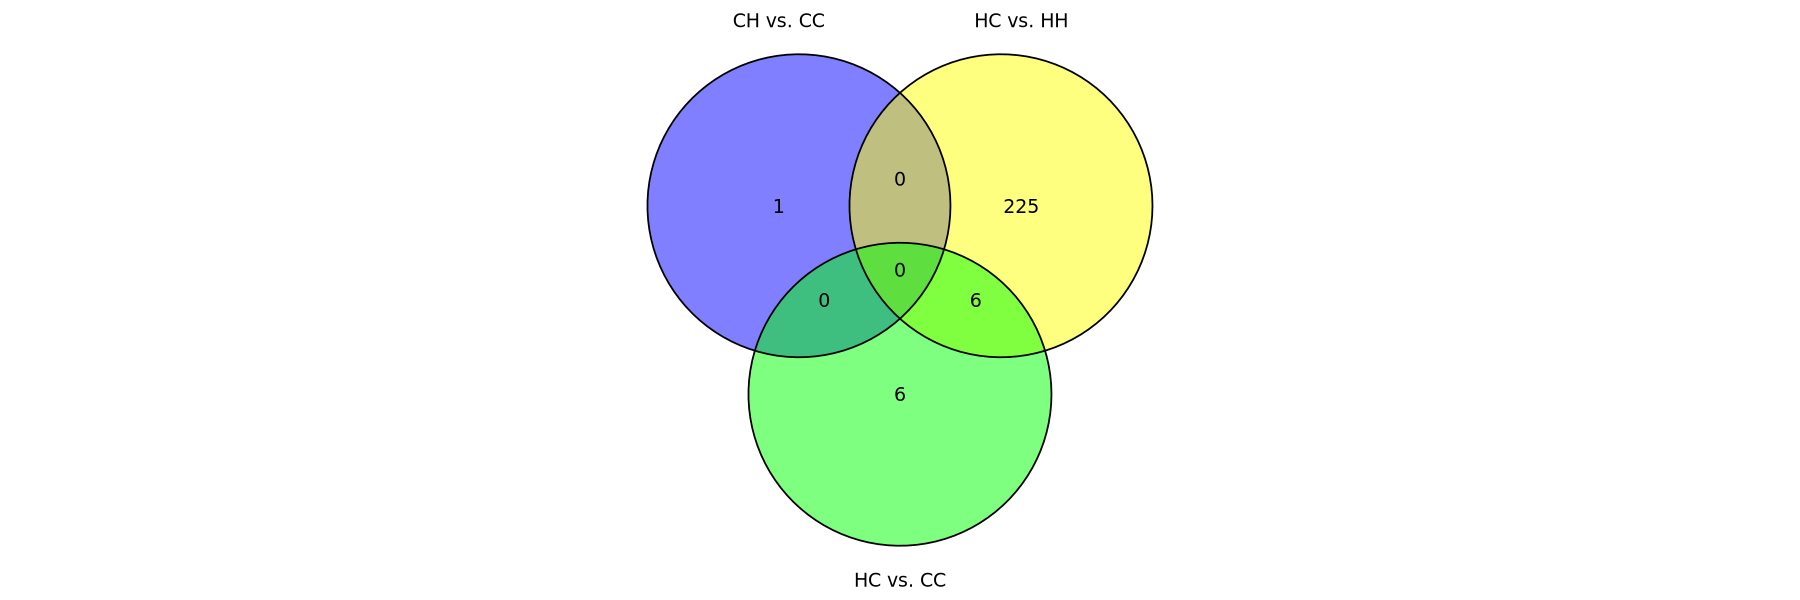

In [21]:
options(repr.plot.width=15, repr.plot.height=5)

x = list(
         B = p1c_p2hc_genes, 
         C = p1h_p2hc_genes, 
         D = p1ch_p2c_genes)

names(x) <- c(
              'CH vs. CC',
              'HC vs. HH',
              'HC vs. CC')

ggvenn(x,
      set_name_size = 4,
      stroke_size = 0.5, 
       show_percentage = FALSE)

I've already invesigated the 6 genes shared between HCvsCC and HCvsHH - now going to look at the 5 shared bewteen P1wc and HCvsHH, and the one shared by P1wc and HCvsCC

First looking at the 5 genes shared between **Phase 1 warm vs. control** and **phase 1 hypoxic/control, phase 2 control**

In [18]:
# phase 1 warm vs. control
p1wc <- select(p1_wc, gene, lfc) # creating new df
colnames(p1wc) <- c('gene','p1wc_lfc') # renaming columns
head(p1wc)

# control control vs. hypoxic control
p2control <- select(p1ch_p2c, gene, lfc) # creating new df
colnames(p2control) <- c('gene', 'p2control_lfc') # renaming columns
head(p2control)

,gene,p1wc_lfc
,<chr>,<dbl>
248,LOC111102814,3.788823
216,LOC111134796,3.683084
57,LOC111120187,3.652089
215,LOC111134419,3.507806
283,LOC111109964,3.440026
307,LOC111113225,3.437061


,gene,p2control_lfc
,<chr>,<dbl>
2,LOC111130870,1.930161
9,LOC111132673,1.418782
6,LOC111129146,1.352978
8,LOC111133874,-1.008349
7,LOC111133892,-1.039787
12,LOC111117745,-1.198957


In [19]:
# finding the 5 genes that are shared sig DMGs
p1wc[p1wc$gene %in% p2control$gene,]

p2control[p2control$gene %in% p1wc$gene,]

,gene,p1wc_lfc
,<chr>,<dbl>
191,LOC111133874,2.115977


,gene,p2control_lfc
,<chr>,<dbl>
8,LOC111133874,-1.008349


LOC111133874 - uncharacterized protein

on NCBI blast - all hits for ncRNAs

now looking at the 5 genes shared between **phase 1 warm vs. control** and **hypoxic control vs. hypoxic hypoxic**

In [20]:
# control control vs. hypoxic control
p1hypoxic <- select(p1h_p2hc, gene, lfc) # creating new df
colnames(p1hypoxic) <- c('gene', 'p1hypoxic_lfc_lfc') # renaming columns

five_gene_1 <- p1wc[p1wc$gene %in% p1hypoxic$gene,] # all 5 are more methylated in phase 1 warm

five_gene_2 <- p1hypoxic[p1hypoxic$gene %in% p1wc$gene,]

df <- merge(five_gene_1, five_gene_2, by = 'gene')

df

gene,p1wc_lfc,p1hypoxic_lfc_lfc
<chr>,<dbl>,<dbl>
LOC111110427,1.977057,0.8826753
LOC111112560,2.205710,2.2036251
LOC111123203,2.361136,-1.2882130
LOC111123963,2.239342,1.0413384
LOC111136073,1.833995,-0.8568357
